In [1]:
import json
import os
import re
import string
import numpy as np
import pandas as pd
import glob
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# directory = 'C:/Users/N1110/Desktop/SMU 2020 SPRING/CORD19/april 15 afternoon/'
# df1= pd.read_csv('HoldOut388PolyermaseAbs.csv')
# df1.head()

In [105]:
# allow access to google drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
data_path = "/content/drive/My Drive/Colab Notebooks/CORD19_april15/data/"
data_filename = data_path +"HoldOut388PolyermaseAbs.csv"
print(data_filename)

/content/drive/My Drive/Colab Notebooks/CORD19_april15/data/HoldOut388PolyermaseAbs.csv


In [129]:
df1= pd.read_csv(data_filename)
df1.head()

,title,abstract
0,Synthesis of virus-specific RNA in permeabiliz...,Abstract We have developed a permeabilized cel...
1,Primary structure and post-translational proce...,Abstract The nucleotide sequence of the peplom...
2,Comparison of the genome organization of toro-...,"Abstract Recently, toroviruses and coronavirus..."
3,The complete sequence (22 kilobases) of murine...,"Abstract The 5′-most gene, gene 1, of the geno..."
4,De novo generation of defective interfering RN...,Abstract Defective interfering (DI) RNAs were ...


In [130]:
df1.shape

(388, 2)

In [131]:
df1['abstract_word_count'] = df1['abstract'].apply(lambda x:len(x.strip().split()))
df1['title_word_count'] = df1['title'].apply(lambda x:len(x.strip().split()))
df1.head()

,title,abstract,abstract_word_count,title_word_count
0,Synthesis of virus-specific RNA in permeabiliz...,Abstract We have developed a permeabilized cel...,122,9
1,Primary structure and post-translational proce...,Abstract The nucleotide sequence of the peplom...,191,11
2,Comparison of the genome organization of toro-...,"Abstract Recently, toroviruses and coronavirus...",157,20
3,The complete sequence (22 kilobases) of murine...,"Abstract The 5′-most gene, gene 1, of the geno...",307,17
4,De novo generation of defective interfering RN...,Abstract Defective interfering (DI) RNAs were ...,204,16


In [132]:
df1.describe()

,abstract_word_count,title_word_count
count,388.000000,388.000000
mean,238.786082,14.489691
std,83.706162,5.465173
min,49.000000,1.000000
25%,181.750000,11.000000
50%,238.000000,14.000000
75%,271.250000,18.000000
max,612.000000,42.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb53b6b2e8>]],
      dtype=object)

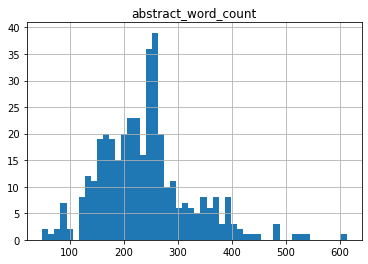

In [133]:
df1.hist(column='abstract_word_count', bins=50)

In [134]:
df1['abstract'].describe(include='all')

count                                                   388
unique                                                  388
top       The G-quadruplex structure forming motifs have...
freq                                                      1
Name: abstract, dtype: object

In [0]:
df1.drop_duplicates(['abstract','title'], inplace=True)

In [136]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                388 non-null    object
 1   abstract             388 non-null    object
 2   abstract_word_count  388 non-null    int64 
 3   title_word_count     388 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.2+ KB


In [0]:
# Remove all characters except letters and numbers

df1['abstract'] = df1['abstract'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]','',x))

In [0]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df1['abstract'] = df1['abstract'].apply(lambda x: lower_case(x))

In [139]:
df1.head()

,title,abstract,abstract_word_count,title_word_count
0,Synthesis of virus-specific RNA in permeabiliz...,abstract we have developed a permeabilized cel...,122,9
1,Primary structure and post-translational proce...,abstract the nucleotide sequence of the peplom...,191,11
2,Comparison of the genome organization of toro-...,abstract recently toroviruses and coronaviruse...,157,20
3,The complete sequence (22 kilobases) of murine...,abstract the 5most gene gene 1 of the genome o...,307,17
4,De novo generation of defective interfering RN...,abstract defective interfering di rnas were ge...,204,16


In [140]:
data1 = np.array(df1.abstract.drop_duplicates(keep='last'))
data1

array(['abstract we have developed a permeabilized cell system for assaying mouse hepatitis virusspecific rna polymerase activity this activity was characterized as to its requirements for mono and divalent cations requirements for an exogenous energy source and ph optimum this system faithfully reflects mhvspecific rna synthesis in the intact cell with regard to both its time of appearance during the course of infection and the products synthesized the system is efficient and the rna products were identical to those observed in intact mhvinfected cells as judged by agarose gel electrophoresis and hybridization permeabilized cells appear to be an ideal system for studying coronavirus rna synthesis since they closely mimic in vivo conditions while allowing much of the experimental flexibility of truly cellfree systems',
       'abstract the nucleotide sequence of the peplomer p protein gene of berne virus bev the torovirus prototype was determined the gene encodes an apoprotein of 1581 

In [141]:
data1.shape

(388,)

In [0]:
data1list=data1.tolist()

In [0]:
# for kernel
# %%capture
# # Install the latest Tensorflow version.
# #!pip3 install --upgrade tensorflow-gpu
# # Install TF-Hub.
# !pip3 install tensorflow-hub
# #!pip3 install seaborn

In [0]:


import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

In [0]:
embeddings = embed(data1list)["outputs"]

In [146]:
embeddings.shape

TensorShape([388, 512])

In [147]:
df1941=pd.DataFrame(np.array(embeddings))
df1941.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,-0.049652,-0.011094,-0.026801,-0.002311,0.042196,0.021205,-0.003560,0.020746,0.045434,0.025883,0.069973,-0.002396,-0.032946,0.010639,-0.012713,-0.070078,-0.060495,0.065397,0.038560,0.025460,-0.026355,-0.045568,-0.049463,0.031212,0.043763,0.031182,0.021027,0.059216,-0.017624,-0.001876,0.064710,0.046516,-0.003964,-0.028002,0.019406,-0.008399,-0.054084,-0.033909,0.011349,0.025290,...,0.038582,0.018266,-0.069591,0.069939,-0.055382,-0.054554,-0.018773,0.037908,0.031636,0.052300,0.043851,-0.069622,0.018744,0.067291,0.035019,-0.023674,0.029275,-0.054982,-0.039467,-0.066418,0.044447,-0.053394,0.007169,0.047496,-0.062104,-0.056488,-0.047228,-0.054749,0.057572,-0.061128,-0.056881,-0.070640,-0.017600,-0.070502,-0.000305,-0.008354,0.054538,-0.007377,-0.035350,-0.052909
1,0.002379,0.018184,-0.040164,-0.030494,0.008339,0.061669,-0.012344,-0.002478,0.036577,0.026191,0.064492,-0.015332,-0.045427,0.047592,0.022340,-0.065065,-0.061265,-0.040045,0.039566,0.017402,-0.061621,0.001405,-0.052613,0.037677,0.027161,0.032055,0.064108,0.024147,-0.055063,-0.054233,-0.004287,0.054627,0.052346,0.000809,-0.015311,-0.023040,-0.047858,0.063710,-0.063907,0.048607,...,0.043554,-0.056346,-0.014363,0.015420,0.001382,-0.009986,-0.056576,-0.059000,-0.039529,0.058591,-0.019062,-0.064481,0.045117,0.062904,0.005887,0.046766,-0.061254,0.046073,-0.058993,-0.020744,-0.030416,0.017363,-0.003764,0.046812,-0.048814,-0.060757,0.011665,-0.040754,-0.012263,-0.030723,-0.051405,-0.065164,-0.010036,-0.065149,0.049234,-0.030314,0.048964,0.011794,-0.028852,-0.064704
2,-0.036349,-0.000761,-0.050869,-0.034782,0.035800,0.060601,0.005766,-0.029210,0.022040,0.053824,0.063295,-0.036119,-0.058253,0.025319,0.052489,-0.062858,-0.062311,-0.055361,0.037994,0.017203,-0.055257,0.035935,-0.048922,0.061963,0.046607,0.028383,0.060900,0.052006,-0.034380,-0.048166,0.062014,0.063209,-0.055082,0.009844,0.044770,0.022172,-0.058960,0.013352,-0.063255,0.049760,...,-0.006460,-0.032602,-0.026388,0.056247,-0.018150,-0.007886,-0.010740,-0.044265,-0.028965,0.059356,-0.044669,-0.061838,0.053094,0.061644,0.051357,0.027900,-0.052515,0.053288,-0.012436,0.023096,0.002236,0.010076,-0.048070,0.045596,-0.026633,-0.061351,0.017284,-0.014943,0.027570,-0.057887,0.035874,-0.063528,-0.059635,-0.063528,0.034254,-0.030137,0.043699,-0.005431,0.057524,-0.056803
3,0.007206,-0.013924,-0.027915,0.040264,0.007304,0.058013,-0.036737,0.023549,0.011380,0.048981,0.058255,-0.019322,-0.054591,0.009389,0.034047,-0.058144,-0.057506,-0.030175,0.056217,0.023046,-0.054957,0.039600,-0.045573,0.057947,0.002866,0.045485,0.058270,-0.009282,-0.002629,-0.056788,0.056599,0.058234,-0.047866,0.021613,0.046828,0.048562,-0.048023,0.056804,-0.058240,0.032230,...,0.005810,-0.026840,-0.001642,0.044235,0.048585,-0.008631,0.050522,-0.057307,-0.052483,0.050239,-0.057331,-0.058225,0.043894,0.057268,0.029237,0.056384,0.027361,0.000401,-0.026201,-0.054846,-0.044612,-0.030727,-0.033108,0.057498,-0.048208,-0.058143,-0.021885,-0.053757,0.004231,-0.056453,-0.057039,-0.058295,-0.052740,-0.058295,0.014025,-0.054457,0.053144,-0.055569,0.049414,-0.057258
4,-0.049280,-0.035973,-0.050783,-0.031401,0.031795,0.059310,0.052120,0.020553,0.001214,0.057714,0.062207,-0.044808,-0.021124,-0.028708,0.061440,-0.057423,-0.057111,-0.050212,0.036499,0.040748,-0.061150,-0.032454,-0.060985,0.056389,0.010707,0.040914,0.060093,-0.052959,0.057990,-0.019332,0.061348,0.061688,-0.056385,0.010793,0.058887,0.058322,-0.026147,0.054823,-0.061819,0.024924,...,-0.040775,0.002507,-0.017342,0.053941,-0.014665,0.032607,-0.029839,-0.048813,0.020374,0.001170,-0.041996,-0.060896,0.045209,0.061427,0.057766,0.041337,0.019221,0.047278,-0.050491,0.037665,-0.017293,-0.003388,-0.054548,0.059405,0.014946,-0.055453,0.002895,-0.048082,0.054

In [148]:
df1941.shape

(388, 512)

In [0]:
df1941.to_csv(data_path+"HoldOut388_512vectors2.csv")